<a href="https://colab.research.google.com/github/BorsattoAndrea/API-project/blob/main/Homework2/Andrea/Sequence_Crossover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=16) 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.utils.vis_utils import plot_model



from sklearn.model_selection import train_test_split
import warnings
import logging

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.9.2


In [4]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [5]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [6]:
!unzip drive/MyDrive/ANNDL2/training_dataset_homework2.zip

Archive:  drive/MyDrive/ANNDL2/training_dataset_homework2.zip
  inflating: y_train.npy             
  inflating: x_train.npy             


In [39]:
X = np.load("x_train.npy")
y = np.load("y_train.npy")
X.shape, y.shape

((2429, 36, 6), (2429,))

In [40]:
label_mapping={
    0: "Wish",
    1: "Another",
    2: "Comfortably",
    3: "Money",
    4: "Breathe",
    5: "Time",
    6: "Brain",
    7: "Echoes",
    8: "Wearing",
    9: "Sorrow",
    10: "Hey",
    11: "Shine"

}

In [41]:
X_nine = X[y == 3]
X_nine.shape

(381, 36, 6)

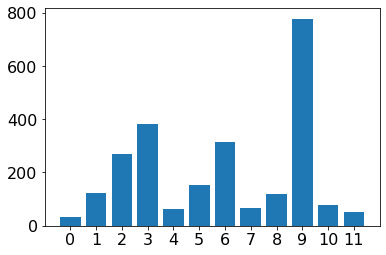

Counter({9: 777, 3: 381, 6: 313, 2: 270, 5: 153, 1: 123, 8: 120, 10: 77, 7: 68, 4: 62, 11: 51, 0: 34})


In [44]:
from collections import Counter
counter = Counter(y)
plt.bar(range(len(counter)), list(counter.values()), align='center')
plt.xticks(range(len(counter)), list(counter.keys()))
plt.show()
print(counter)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/10, random_state=seed)
 #X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=seed) #1/9 * 9/10 = 1/10

In [46]:
from sklearn.utils import class_weight 
class_weights = class_weight.compute_class_weight(class_weight="balanced",
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {i : class_weights[i] for i in range(12)}
class_weights

{0: 5.52020202020202,
 1: 1.597953216374269,
 2: 0.7686357243319268,
 3: 0.5357843137254902,
 4: 3.195906432748538,
 5: 1.2392290249433107,
 6: 0.6552757793764988,
 7: 2.9863387978142075,
 8: 1.7024922118380061,
 9: 0.2602380952380952,
 10: 2.640096618357488,
 11: 4.236434108527132}

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2186, 36, 6), (243, 36, 6), (2186,), (243,))

Test for SMOTE

In [52]:
orig_shape = X_train.shape
print(orig_shape)

new_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
print(new_train.shape)

(2186, 36, 6)
(2186, 216)


In [53]:
from imblearn.over_sampling import SMOTE

for label in label_mapping:
  print("Before OverSampling, counts of label '{}': {}".format(label, sum(y_train == label)))

sm = SMOTE(random_state = seed)
X_train_res, y_train_res = sm.fit_resample(new_train, y_train.ravel())

print('\nAfter OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

for label in label_mapping:  
  print("After OverSampling, counts of label '{}': {}".format(label, sum(y_train_res == 1)))

Before OverSampling, counts of label '0': 33
Before OverSampling, counts of label '1': 114
Before OverSampling, counts of label '2': 237
Before OverSampling, counts of label '3': 340
Before OverSampling, counts of label '4': 57
Before OverSampling, counts of label '5': 147
Before OverSampling, counts of label '6': 278
Before OverSampling, counts of label '7': 61
Before OverSampling, counts of label '8': 107
Before OverSampling, counts of label '9': 700
Before OverSampling, counts of label '10': 69
Before OverSampling, counts of label '11': 43

After OverSampling, the shape of train_X: (8400, 216)
After OverSampling, the shape of train_y: (8400,) 

After OverSampling, counts of label '0': 700
After OverSampling, counts of label '1': 700
After OverSampling, counts of label '2': 700
After OverSampling, counts of label '3': 700
After OverSampling, counts of label '4': 700
After OverSampling, counts of label '5': 700
After OverSampling, counts of label '6': 700
After OverSampling, counts of

In [55]:
reshaped_train = np.reshape(X_train_res, orig_shape)
print(X_train_res.shape)

ValueError: ignored

In [ ]:
# Convert the sparse labels to categorical values
y_train = tfk.utils.to_categorical(y_train)
y_test = tfk.utils.to_categorical(y_test)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((2186, 36, 6), (243, 36, 6), (2186, 12), (243, 12))

In [30]:
def inspect_activity(x,y):
  data = pd. DataFrame(x, columns=['Column1', 'Column2','Column3', 'Column4','Column5', 'Column6'])
  axis = data.plot(subplots=True, figsize=(17, 9), title=label_mapping.get(y))
  for ax in axis:
      ax.legend(loc='lower right')

In [31]:
X_train.shape

(2186, 36, 6)

In [ ]:
X_train.max(axis=0).shape

(36, 6)

In [ ]:
y_train[y_train==0][0]

0

In [32]:
for label in label_mapping:
  for i in range(3):
    inspect_activity(X_train_res[y_train_res==label][i],y_train_res[y_train_res==label][i])

ValueError: ignored

In [ ]:
X_train_shape = X_train.shape
X_test_shape = X_test.shape

In [ ]:
X_train_reshaped = X_train.reshape((X_train_shape[0] * X_train_shape[1],X_train_shape[2]))
X_test_reshaped = X_test.reshape((X_test_shape[0] * X_test_shape[1],X_test_shape[2]))

In [ ]:
X_train_reshaped[X_train_reshaped[:,0] >1000,0].shape

In [ ]:
figure, axis = plt.subplots(3, 2, figsize=(15, 15))
axis = axis.flatten()
for i in range(6):
  axis[i].plot(X_train_reshaped[:,i])
  axis[i].set_title(label_mapping.get(i))

In [ ]:
figure, axis = plt.subplots(3, 2, figsize=(15, 15))
axis = axis.flatten()
for i in range(6):
  axis[i].plot(np.sort(X_train_reshaped[:,i]))
  axis[i].set_title(label_mapping.get(i))